# PyAlgoGem - Demo Notebook
## Python package for building cryptocurrency trading algorithms using Gemini

In [1]:
import pyalgogem as pag
import datetime as dt
%matplotlib inline

### Initialize package

In [2]:
# create main object for package
ae = pag.AlgorithmEnvironment()

In [3]:
# select window and symbols
ae.window = 'd' # daily
ae.symbol = 'eth' # ethereum

In [4]:
# update all historical data for btc and eth
ae.update_historical_all()

All available historical data for BTC has been successfully loaded!
All available historical data for ETH has been successfully loaded!


In [5]:
# specify a start time to focus on more recent data
start = dt.date(2017,5,1)

### Importing data from local HDF5 files

In [6]:
# read data time frame
ae.read_stored_data(start = start)

Data has been loaded into 'dataset' object!


In [7]:
# get dataset object
# and view raw dataset
ds = ae.dataset
ds.raw.head()

,close,high,low,open,vol_from,vol_to
2017-05-01 17:00:00,77.70,80.59,74.51,77.33,107670.73,8180421.27
2017-05-02 17:00:00,80.00,81.86,75.18,77.70,29233.32,2292382.37
2017-05-03 17:00:00,94.99,95.77,79.74,80.00,67030.48,5839628.09
2017-05-04 17:00:00,91.64,97.98,88.05,94.99,48399.04,4526816.34
2017-05-05 17:00:00,95.84,96.98,90.53,91.64,49146.76,4597061.09


In [8]:
# view sample dataset in dataset object
ds.sample.head()

,close,returns
2017-05-01 17:00:00,77.70,NaN
2017-05-02 17:00:00,80.00,0.029171
2017-05-03 17:00:00,94.99,0.171745
2017-05-04 17:00:00,91.64,-0.035904
2017-05-05 17:00:00,95.84,0.044812


### Create new SMA indicator

In [9]:
# create new sma object with SMA1 = 7 and SMA = 31
sma = ae.new_sma_indicator(7,31)

In [10]:
# execute strategy
sma.execute_strategy()

(5.17, 2.42)

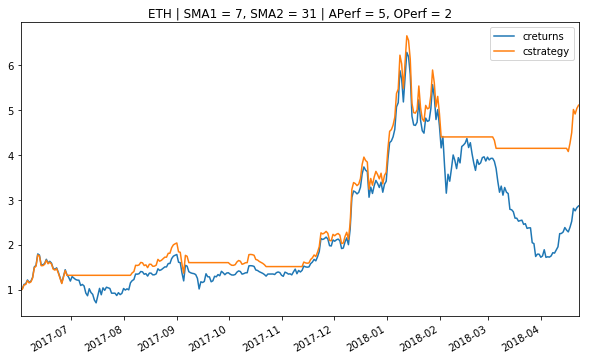

In [11]:
# plot the results of the strategy with the current SMA parameters
sma.plot_results()

### Optimize Parameters | SMA Strategy

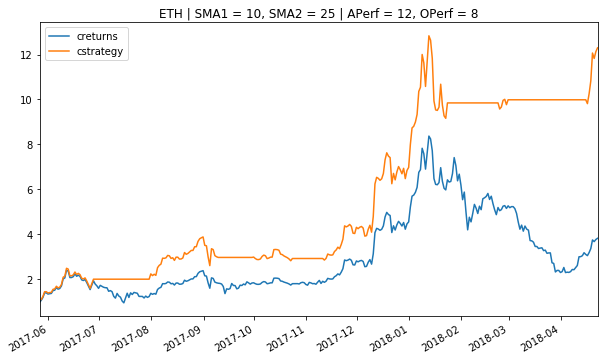

In [12]:
# pass tuples of ranges for SMA1 and SMA2 in the form of:
# (start, stop, step)

# plot optimal parameters and view parameters in plot title

sma.optimize_parameters((5,15,1),(15,50,2))
sma.plot_results()

### Momentum Indicator

In [13]:
# create momentum indicator object with momentum = 8
mom = ae.new_mom_indicator(8)

C:\Users\Admin\PycharmProjects\PyAlgoGem\pyalgogem\strategy\_indicator.py:264: RuntimeWarning: invalid value encountered in sign
  data['position'] = np.sign(data['returns'].rolling(self.mom).mean())


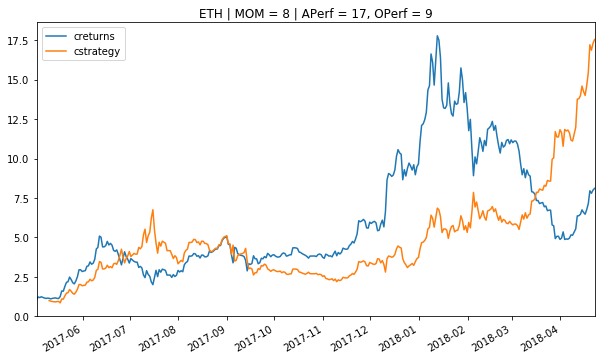

In [14]:
# plot results of strategy at current setting
mom.plot_results()

### Optimize Parameters | Momentum Strategy

C:\Users\Admin\PycharmProjects\PyAlgoGem\pyalgogem\strategy\_indicator.py:264: RuntimeWarning: invalid value encountered in sign
  data['position'] = np.sign(data['returns'].rolling(self.mom).mean())


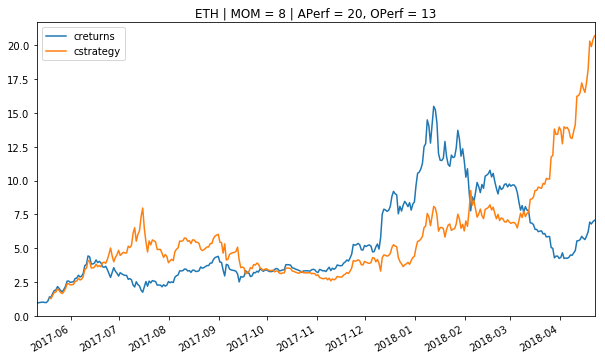

In [15]:
# pass tuples of ranges for MOM the form of:
# (start, stop, step)

# plot optimal parameter and view parameters in plot title

mom.optimize_parameters((3,15,1))
mom.plot_results()

### Mean-Reversion Indicator

In [16]:
# create new mean-reverting indicator with SMA = 5 and threshold = 0.25
mr = ae.new_mr_indicator(5,0.25)

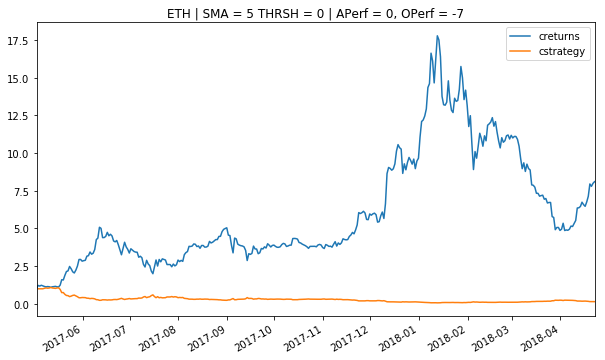

In [17]:
mr.plot_results()

### Optimize Parameters | Mean-Reversion

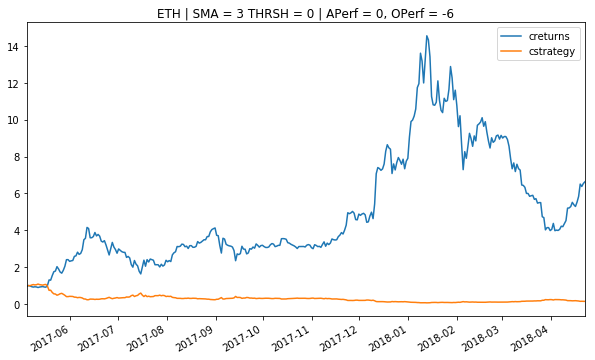

In [18]:
# pass tuples of ranges for SMA and threshold the form of:
# (start, stop, step)

# plot optimal parameters and view parameters in plot title

mr.optimize_parameters((3,15,1),(0.01,25,1))
mr.plot_results()